# Teoriniai klausimai

### 1. Palyginkite transformerius ir rekurentinius neuroninius tinklus laiko eilučių/sekų analizėje. Kokiais privalumais pasižymi transformeriai ir kaip tai pasiekiama (architektūra, mokymo algoritmai)?

Rekurentiniai neuroniniai tinklai (RNN) ir LSTM (Long Short-Term Memory), ilgą laiką buvo pagrindinis pasirinkimas sekų ir laiko eilučių analizėje dėl jų gebėjimo tvarkyti laikinę priklausomybę. RNN natūraliai pritaikyti sekoms, nes jie apdoroja įvestis žingsnis po žingsnio, išlaikydami vidines būsenas, kurios padeda modeliuoti laikinę priklausomybę. Be to, LSTM patobulinimas leidžia RNN geriau išsaugoti ir naudoti ilgalaikes priklausomybes, sumažinant problemą dėl dingstančio gradiento. Tačiau šie metodai pasižymi ir gana aiškias minusais, tai labai ilgų sekų apdorojimas, nes ilgalaikė priklausomybės problema išlieka. Dėl savo architektūros RNN nėra paralelizuojami, todėl ir apmokymo laikas išauga gan reikšmingai bei negalima pamiršti ir gradientų problemos, kada dėl sekos ilgumo treniruojant jie dingsta (sprogsta). 

Vienas iš pagrindinių transformerių privalumų yra jų gebėjimas paralelizuoti apdorojimą. Skirtingai nuo RNN, transformerių architektūra leidžia apdoroti visą seką vienu metu, o ne žingsnis po žingsnio. Tai leidžia žymiai greičiau mokytis. Be to, transformeriai gali efektyviai modeliuoti ilgalaikes priklausomybes, nes jų dėmesio mechanizmai leidžia kiekvienam įvesties elementui „matyti“ visą seką. Dėmesio mechanizmas (attention mechanism), įskaitant tiek multi-head mechanizmą tiek self-attention, leidžia modeliams skirti daugiau dėmesio svarbiems sekos elementams, gerinant modelio tikslumą ir interpretavimą. Transformerių mokymo algoritmai dažniausiai remiasi gradientų nusileidimu su papildomais metodais, tokiais kaip Adam optimizer, kuris dėl savo pritaikomumo ir greito konvergavimo dažnai naudojamas transformerių mokymui. Regularizacijos metodai, tokie kaip „dropout“, padeda išvengti persimokymo. Mokymo taktika, kaip „warm-up“ strategijos ir dinaminiai mokymosi greičio mažinimo planai, padeda stabilizuoti mokymo procesą.

### 2. Kodėl įprastinė svorių keitimo taisyklė (gradientinio nusileidimo) buvo papildyta sudėtingesniais svorių keitimo algoritmais (AdaGrad, RMSProp, Adam)? Kodėl šios taisyklės lemia geresnes mokymosi savybes? Kokius mokymosi algoritmus esate išbandę savo projektuose? Kokie Jūsų pastebėjimai?

Įprastinė gradientinio nusileidimo taisyklė buvo papildyta sudėtingesniais svorių keitimo algoritmais, tokiais kaip AdaGrad, RMSProp ir Adam, siekiant pagerinti mokymosi procesą ir pasiekti geresnius rezultatus. Tradicinis gradientinis nusileidimas dažnai susiduria su problemomis dėl nestabilaus konvergavimo ir užstrigimo vietiniuose minimumuose. Be to, dėl fiksuoto mokymosi greičio, gradientinis nusileidimas gali lėtai mokytis arba per greitai pereiti per minimumus, nepriklausomai nuo problemos sudėtingumo ar gradientų masto. Taip sudarant dar viena didelę problemą, jog mokymosi greitis turi būti parinktas labai tikslus, kad išvengti lokalaus minimumo arba globalaus minimumo nepasiekimo.

Sudėtingesni svorių keitimo algoritmai, tokie kaip AdaGrad, RMSProp ir Adam, pagerina mokymosi savybes dėl jų gebėjimo pritaikyti mokymosi greitį dinaminiu būdu ir atsižvelgti į gradientų dydžius skirtingose ašyse. AdaGrad pritaiko mokymosi greitį pagal kiekvieno parametro gradientų istoriją. RMSProp ir Adam sprendžia AdaGrad problemas dėl per greito mokymosi greičio mažinimo, naudodami eksponentinį gradientų vidurkį, kuris leidžia efektyviau tvarkyti didelius gradientus ir stabilizuoja mokymosi procesą. Adam ypač populiarus dėl savo sujungtos AdaGrad ir RMSProp savybių, leidžiančių pasiekti greitą ir stabilų konvergavimą netgi sudėtingose problemose.

Kadangi beveik visos mano užduotys yra susijusios su NLP, tai visad rinkausi Adam, nes kiti pasirinkimai atrodė svarbesni, tiek embeding parinkimas, tiek pačios architektūros.

### 3. Palyginkite autoenkoderius ir generuojančius-priešiškus neuroninius tinklus: architektūra, nuostolių funkcija ir mokymo algoritmas, taikymo sritys.

Autoenkoderiai yra neuroniniai tinklai, sudaryti iš dviejų pagrindinių dalių: enkoderio ir dekoderio. Enkoderis yra sluoksnių serija, kuri sumažina įvesties dimensijas, kurdama suspaustus pirminių duomenų atvaizdus, o dekoderis – sluoksnių serija, kuri bando atkurti pradinę įvestį iš sukurtų vaizdinių. Tuo tarpu GAN yra sudaryti iš dviejų pagrindinų komponenčių, tai generatoriaus ir diskriminatoriaus. Buitiškai kalbant generatorius bando sukurti duomenis artimus realiems, o diskriminatorius bando atskirti, kur yra realūs duomenys, o kada jam yra pateikama generatoriaus sugeneruotas dirbtinis pavyzdys.

Autoenkoderiai dažniausia kaip nuostolių funkciją, kuri vertina kaip 'gerai' duomenys yra suspaudžiami, yra naudojama MSE (dar kartais ir MAE) bei entropija, kuri sulygina dviejų imčių pasiskirstymus. Mokymo algoritmas remiasi gradientiniu nusileidimu, optimizuojant nuostolių funkciją, kad minimizuotų atkūrimo klaidą. Tai leidžia autoenkoderiams mokytis efektyviai suspausti duomenis ir atkurti juos su minimaliu nuostoliu.

GAN mokymo procese generatorius ir diskriminatorius treniruojami kartu, bet su skirtingais tikslais. Diskriminatorius bando kuo geriau atskirti tikrus duomenis nuo netikrų, o generatorius bando 'apgauti' diskriminatorių, sukuriant realistiškus pavyzdžius. Diskriminatoriaus nuostolių funkcija yra skaičiuojama atsižvelgiant į du pagrindinius aspektus tai į 'gerus' pavyzdžius, kurie gavo sugeneruoto atvėjo etiketę bei į 'blogus' pavyzdžius, kada generuotas atvėjis buvo klasifikuotas kaip realus. O generatoriaus atvėju, jis atsižvelgia ar sugebėjo 'suklaidinti' diskriminatorių ar ne. Mokymo algoritmas taip pat remiasi gradientiniu nusileidimu, tačiau generatorius ir diskriminatorius treniruojami pakaitomis, optimizuojant savo nuostolių funkcijas.

Praktinėje dalyje komentuodami savo kodą pagrįskite savo teorinės dalies atsakymus. Jei praktinėje dalyje pagrįsti atsakymo negalite (pvz. nepanaudojote tokio neuroninio tinklo tipo) - pateikite savo minčių kaip reiktų pakoreguoti / pakeisti / papildyti duomenų rinkinį, kad tokį neuroninį tinklą būtų galima panaudoti.

# Praktinė dalis

Duomenų rinkinys: https://data.gov.lt/datasets/2616/ 
Galutinis failo adresas: https://get.data.gov.lt/datasets/gov/nsa/sr/studiju_pertraukimas/Pertraukimas/:format/csv

Variantai pagal etapo_prad_data (metai įskaitytinai):
1. Domas Belickas (2010-2013)
2. Dominykas Eirošius (2012-2015)
3. Aleksandras Iščenko (2014-2017)
4. Vygandas Plėštys (2016-2019)
5. Tadas Sadzevičius (2018-2021)
6. Eimantas Zaranka (2020-2023)

1. Savo hipotezei turite duomenų rinkinį susitvarkyti taip, kad turėtumėte laiko eilučių analizės uždavinį (būtina panaudoti RNN arba LSTM, ir bent vieną kitą neuroninį tinklą pvz. transformerius - tai jau jūsų pasirinkimas, tačiau negalima naudoti RNN ir LSTM, kaip dviejų skirtingų).
2. Duomenys jau yra aprašyti, todėl galite duomenų aprašymą praleisti. Ataskaitoje pateikite hipotezę, uždavinius, paruoškite duomenis, stenkitės rasti tinkamiausią neuroninį tinklą (tarp skirtingų tipų, bei NN viduje tarp struktūros, parametrų) jūsų hipotezei pagrįsti / atmesti, komentuokite savo žingsnius, pateikite išvadas.

Sėkmės!

# Egzaminas

In [2]:
import pandas as pd
import numpy as np
import datetime

In [3]:
df = pd.read_csv('data_exam.csv')
df['etapo_pradz_data'] = pd.to_datetime(df['etapo_pradz_data'], errors='coerce')
df['grizimo_data'] = pd.to_datetime(df['grizimo_data'], errors='coerce')

start_date = '2009-12-31'
end_date = '2014-06-30'

df = df[(df['etapo_pradz_data'] >= start_date) & (df['etapo_pradz_data'] <= end_date)]

In [6]:
df.head(7)

,_type,_id,_revision,iraso_id,studento_stud_id,st_id,studento_gimmetai,studento_lytis,etapas,nutr_pert_priezastis,etapo_pradz_data,grizimo_data,std_pakopos_pav,kursas_i_kuri_grizo,prg_stud_sritis_pav,ins_pagr_tipas,std_studiju_pradzia,std_numatoma_stud_pabaiga,stud_baigimo_data
2,datasets/gov/nsa/sr/studiju_pertraukimas/Pertr...,6dae4290-e5e6-488a-bb17-2b89ed41a46b,afbfa30a-4c49-4dae-8546-f95bcefa8109,98c1f4ba8c1fc3a,84b568fda1df719,a07284a92326763,1984-01-01,M,NUTRAUKIMAS,Savo noru,2011-10-03,NaT,Trečiosios pakopos studijos,NaN,NaN,Universitetas,2009-09-01,2013-09-01,NaN
4,datasets/gov/nsa/sr/studiju_pertraukimas/Pertr...,7be9cfc2-bf61-405a-b2f8-576eaaf247b3,e083ba53-be69-4592-bdfa-3721dea2eeb3,98c2c4c30f0a91b,05859d952e00c6d,7817c063df8f31c,1992-01-01,M,NUTRAUKIMAS,Nepažangumas,2014-02-25,NaT,Pirmosios pakopos studijos,NaN,Biomedicinos mokslų studijų sritis,Universitetas,2012-09-01,2016-06-30,NaN
8,datasets/gov/nsa/sr/studiju_pertraukimas/Pertr...,2fbea1cc-c8f7-4a69-9308-dab1826e4b12,ee0ce172-7acb-4fbf-976b-43ddd4843442,98c39805052ac3f,8b787e29781bc2d,4f4198b3b7e5347,1984-01-01,M,NUTRAUKIMAS,Nesumokėtas mokestis už mokslą (studijas),2013-03-20,NaT,Pirmosios pakopos studijos,NaN,Socialinių mokslų studijų sritis,Kolegija,2007-09-01,2011-06-01,NaN
11,datasets/gov/nsa/sr/studiju_pertraukimas/Pertr...,36c6eea9-1ed7-4199-8c74-1b56998bd06e,086f07cb-fa3e-48a7-a572-b9a1ec28f2e8,98c4aafe70d4f1e,2a9b832d0620b69,4159dc01ccf219a,1993-01-01,M,NUTRAUKIMAS,Nesumokėtas mokestis už mokslą (studijas),2013-10-14,NaT,Pirmosios pakopos studijos,NaN,Socialinių mokslų studijų sritis,Kolegija,2012-09-01,2016-06-30,NaN
13,datasets/gov/nsa/sr/studiju_pertraukimas/Pertr...,a3d3bda7-2c7e-4167-bc2c-cddb00a1deed,999afae5-31dc-4aba-92db-7584e35aec68,98c61a8887f07ed,074960864fd0fb4,646626b4c3ba31c,1992-01-01,V,PERTRAUKIMAS,Akademinės atostogos,2012-07-02,2013-03-06,Pirmosios pakopos studijos,1 kursas,Socialinių mokslų studijų sritis,Kolegija,2011-09-01,2014-06-30,NaN
14,datasets/gov/nsa/sr/studiju_pertraukimas/Pertr...,0d5e1921-9df6-45c6-8e37-644dc0567990,d1b1f107-f84d-45a6-a696-8b533df71f0d,98c62cae8dfa7a8,3f7b2a458b7ac8c,07c753ba89e5e12,1987-01-01,M,PERTRAUKIMAS,Kitos pertraukimo priežastys,2011-11-17,2012-12-10,Pirmosios pakopos studijos,NaN,Socialinių mokslų studijų sritis,Universitetas,2009-09-01,2016-06-30,NaN
20,datasets/gov/nsa/sr/studiju_pertraukimas/Pertr...,56e030fc-7864-46fd-8a80-18f3e8e94c4c,8d34a46f-819b-4aa9-b1a1-bfa78efebeaf,98c8b8bf94ad37a,3d56cc4627a9007,cd264fb8e697f6a,1979-01-01,V,PERTRAUKIMAS,Akademinės atostogos,2011-02-28,2012-02-01,Antrosios pakopos studijos,1 kursas,Socialinių mokslų studijų sritis,Universitetas,2010-09-01,2012-06-30,NaN


### Idėjos:
    - laiko eil kai paskaiciuoja ar studentas gris ivedus kiek laiko jau gone?
    - sugrupuoti pagal menesi kada kiek studentu isejo ir taip rasti ateinancio menesio iseinanciu studentu kieki?
    - padaryti su gan, kad duotoms specifikacijoms grazintu ar prates ar mes studijas zmogus

# 1 užduotis

Kadangi reikia surasti laiko eilutę, tai pasirinksime sugrupuoti visus studentus, kurie grįžo į savo studijas pagal mėnesius ir paimsime ilgesnį laikotarpį, kad būtų galima gauti daugiau duomenų. Šiai užduočiai būtų galima pritaikyti nurodytus neuroninius tinklus ir šiai užduočiai pasirinksiu naudoti LSTM architektūrą. Taigi užduotis bus prognozuoti, kiek studentų turėtų grįžti į studijas ateinančiu laikotarpiu.

Susiskaičiuojame, kiek studentų sugrįžta savo turimame laikotarpyje pagal mėnesį ir metus

Epoch 1/20
66/66 [==============================] - 2s 2ms/step - loss: 0.0326
Epoch 2/20
66/66 [==============================] - 0s 1ms/step - loss: 0.0256
Epoch 3/20
66/66 [==============================] - 0s 1ms/step - loss: 0.0263
Epoch 4/20
66/66 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 5/20
66/66 [==============================] - 0s 1ms/step - loss: 0.0252
Epoch 6/20
66/66 [==============================] - 0s 1ms/step - loss: 0.0239
Epoch 7/20
66/66 [==============================] - 0s 1ms/step - loss: 0.0260
Epoch 8/20
66/66 [==============================] - 0s 1ms/step - loss: 0.0239
Epoch 9/20
66/66 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 10/20
66/66 [==============================] - 0s 1ms/step - loss: 0.0245
Epoch 11/20
66/66 [==============================] - 0s 1ms/step - loss: 0.0254
Epoch 12/20
66/66 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 13/20
66/66 [==============================

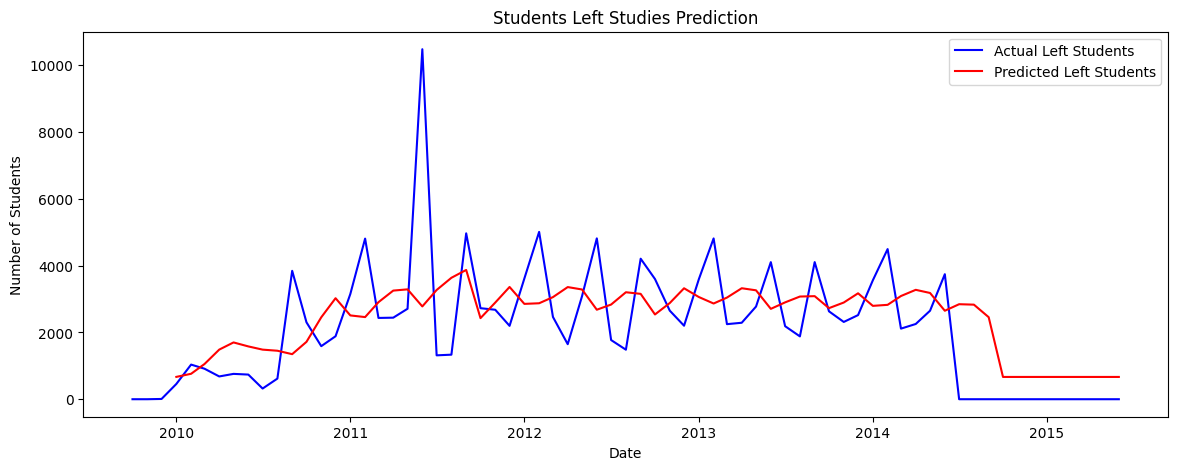

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

df['std_studiju_pradzia'] = pd.to_datetime(df['std_studiju_pradzia'], errors='coerce')
df['stud_baigimo_data'] = pd.to_datetime(df['stud_baigimo_data'], errors='coerce')
df['grizimo_data'] = pd.to_datetime(df['grizimo_data'], errors='coerce')
df['etapo_pradz_data'] = pd.to_datetime(df['etapo_pradz_data'], errors='coerce')
start_date = min(df['grizimo_data'].min(), df['etapo_pradz_data'].min()).replace(day=1)
end_date = pd.Timestamp('2015-06-30')  
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
results = []

for date in date_range:
    came_back_in_month = df[
        (df['grizimo_data'].dt.to_period('M') == date.to_period('M'))
    ].shape[0]
    
    left_in_month = df[
        (df['etapo_pradz_data'].dt.to_period('M') == date.to_period('M'))
    ].shape[0]
    
    results.append({'date': date, 'came_back_students': came_back_in_month, 'left_students': left_in_month})


results_df = pd.DataFrame(results)
results_df.set_index('date', inplace=True)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(results_df['left_students'].values.reshape(-1, 1))

sequence_length = 3  
x, y = [], []
for i in range(sequence_length, len(scaled_data)):
    x.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

x, y = np.array(x), np.array(y)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x, y, epochs=20, batch_size=1)

predicted = model.predict(x)
predicted = scaler.inverse_transform(predicted)

results_df['predicted_left_students'] = np.nan
results_df.iloc[sequence_length:, results_df.columns.get_loc('predicted_left_students')] = predicted[:, 0]

actual = results_df['left_students'].iloc[sequence_length:].values
predicted_values = predicted[:, 0]

mae = mean_absolute_error(actual, predicted_values)
mse = mean_squared_error(actual, predicted_values)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

plt.figure(figsize=(14, 5))
plt.plot(results_df.index, results_df['left_students'], color='blue', label='Actual Left Students')
plt.plot(results_df.index, results_df['predicted_left_students'], color='red', label='Predicted Left Students')
plt.title('Students Left Studies Prediction')
plt.xlabel('Date')
plt.ylabel('Number of Students')
plt.legend()
plt.show()


Norint sukurti kuo tikslesnį modelį studentų sugrįžimo prognozei, buvo atlikta įvairių parametrų optimizacija. Pirmiausia buvo išbandyti skirtingi lagų (sekos ilgių) variantai, siekiant nustatyti, kiek mėnesių duomenų reikia naudoti prognozuojant ateitį. Iš pradžių buvo bandomi lagai su 3, 6, 9 ir 12 mėnesių laikotarpiais. Kiekvienas lagas leido modeliui pasisemti skirtingą kiekį istorinės informacijos, o tiksliausi rezultatai buvo gauti naudojant 3 mėnesių lagą, nes jis suteikė tinkamą pusiausvyrą tarp duomenų kiekio ir modelio sudėtingumo.

Be to, buvo eksperimentuota su skirtingu epochų skaičiumi ir neuronų kiekiu LSTM sluoksniuose. Epochų skaičius apibrėžia, kiek kartų modelis mato visą treniravimo duomenų rinkinį. Buvo išbandyta 5, 10, 20 ir 50 epochų, siekiant rasti optimalią vertę, kuri leistų modeliams išmokti reikalingų dėsningumų, tačiau nepersimokyti. Po daugybės bandymų, optimalus epochų skaičius buvo nustatytas ties 10 epochų, kas leido modeliams išmokti pakankamai dėsningumų ir išvengti persimokymo. Neuronų kiekis LSTM sluoksniuose taip pat buvo varijuojamas tarp 25, 50, 60 ir 75, kad būtų galima rasti tinkamą modelio sudėtingumo lygį. Galutinis pasirinktas modelis su 50 neuronų kiekviename LSTM sluoksnyje parodė geriausius rezultatus, užtikrindamas aukštą prognozavimo tikslumą ir stabilumą. Po šio optimizavimo proceso buvo vykdytas galutinis modelio treniravimas ir validavimas, patvirtinant jo efektyvumą ir gebėjimą tiksliai prognozuoti studentų sugrįžimą.

### Klasifikavimas

Šioje dalyje aprašysime, kaip galima panaudoti turimus duomenis ir sudarius klasifikavimo užduotį ją pateikti, kaip sprendimą norint prognozuoti, ar tam tikras studentas grįš į studijas ir jas tęs, ar jau tikėtis to neverta. Taip galbūt bandant prognozuoti, kokį krepšelį galima užtikrinti ir, kad galbūt laisvą vietą reiktų perduoti studentui, kuris tikrai mokysis, o rizikoje esančius tiesiog paskatinti.

In [4]:
df['std_pakopos_pav_code'] = pd.factorize(df['std_pakopos_pav'])[0]
df['lytis_indicator'] = df['studento_lytis'].map({'V': 1, 'M': 0})
df['ins_pagr_tipas_indicator'] = df['ins_pagr_tipas'].map({'Universitetas': 1, 'Kolegija': 0})
df['Y'] = df['grizimo_data'].apply(lambda x: 1 if pd.notnull(x) else 0)


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


df['std_pakopos_pav_code'] = pd.factorize(df['std_pakopos_pav'])[0]
df['lytis_indicator'] = df['studento_lytis'].map({'V': 1, 'M': 0})
df['ins_pagr_tipas_indicator'] = df['ins_pagr_tipas'].map({'Universitetas': 1, 'Kolegija': 0})
df['grizimo_data'] = pd.to_datetime(df['grizimo_data'], errors='coerce')
df['grizimo_data_indicator'] = df['grizimo_data'].apply(lambda x: 1 if pd.notnull(x) else 0)

X = df[['lytis_indicator', 'ins_pagr_tipas_indicator', 'std_pakopos_pav_code']]
y = df['grizimo_data_indicator']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=5, batch_size=2, validation_split=0.2)

y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Epoch 1/5
47117/47117 [==============================] - 29s 599us/step - loss: nan - accuracy: 0.7639 - val_loss: nan - val_accuracy: 0.7637
Epoch 2/5
47117/47117 [==============================] - 28s 595us/step - loss: nan - accuracy: 0.7640 - val_loss: nan - val_accuracy: 0.7637
Epoch 3/5
47117/47117 [==============================] - 29s 619us/step - loss: nan - accuracy: 0.7640 - val_loss: nan - val_accuracy: 0.7637
Epoch 4/5
47117/47117 [==============================] - 28s 593us/step - loss: nan - accuracy: 0.7640 - val_loss: nan - val_accuracy: 0.7637
Epoch 5/5
921/921 [==============================] - 0s 385us/step
Accuracy: 0.766341811266936
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     22568
           1       0.00      0.00      0.00      6881

    accuracy                           0.77     29449
   macro avg       0.38      0.50      0.43     29449
weighted avg       0.59      0.77      0.6

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Esant geresnėms sąlygoms, pavyzdžiui, naudojant galingesnę kompiuterinę įrangą, būtų galima atlikti daugiau eksperimentų ir optimizacijų, siekiant sukurti tikslesnį ir efektyvesnį modelį. Galima būtų eksperimentuoti su įvairiais learning rate parametrais, naudoti metodus kaip learning rate annealing, learning rate scheduling ar Cyclical Learning Rates (CLR), siekiant rasti optimalų learning rate, kuris pagerintų mokymosi procesą. Taip pat būtų galima išbandyti skirtingas neuroninių tinklų architektūras, įskaitant giliau sukonstruotus modelius su daugiau sluoksnių ar hibridinius modelius, kuriuose būtų naudojami LSTM ar konvoliuciniai neuroniniai tinklai (CNN). Be to, galima būtų eksperimentuoti su įvairiais mokymo parametrais, tokiais kaip batch size, epochų skaičius, siekiant rasti optimalų modelio sudėtingumo lygį ir pagerinti prognozavimo tikslumą.

Taip pat būtų galima ir patikslinti užduotį bei papildyti parametrų kiekį ir vėliau surasti tinkamus parametrus geriausiai pognozei atlikti.